In [15]:
#import keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [16]:
#initialize the CNN
Classifier=Sequential()

In [17]:
#step-1:convolution

Classifier.add(Convolution2D(128, (3, 3), input_shape = (64, 64, 3),
                      activation = 'relu'))
Classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
Classifier.add(Convolution2D(64, (3,3),activation = 'relu'))
Classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a third convolutional layer
Classifier.add(Convolution2D(32, (3, 3),activation = 'relu'))
Classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a third convolutional layer
Classifier.add(Convolution2D(16, (3, 3),activation = 'relu'))
Classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [18]:
#step-3:flattening
Classifier.add(Flatten())
Classifier.add(Dense(output_dim=128,activation='relu'))
Classifier.add(Dense(output_dim=64,activation='relu'))
Classifier.add(Dense(output_dim=32,activation='relu'))
Classifier.add(Dense(output_dim=16,activation='relu'))

Classifier.add(Dense(output_dim=1,activation='sigmoid'))

C:\Users\ANIL\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ANIL\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64)`
  after removing the cwd from sys.path.
C:\Users\ANIL\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """
C:\Users\ANIL\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16)`
  
C:\Users\ANIL\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(act

In [19]:
#compiling the CNN
Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
#fitting th CNN to the images

from keras.preprocessing.image import ImageDataGenerator 
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [21]:
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (64,64 ),
                                                 batch_size = 1,
                                                 class_mode = 'binary')
test_set = test_datagen.flow_from_directory('test',
                                            target_size = (64, 64),
                                            batch_size = 1,
                                            class_mode = 'binary')

Found 8314 images belonging to 2 classes.
Found 3326 images belonging to 2 classes.


In [ ]:
model_class=Classifier.fit_generator(training_set,
                        samples_per_epoch=8314,
                        nb_epoch=50,
                        validation_data=test_set,
                        nb_val_samples=3326)

C:\Users\ANIL\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
C:\Users\ANIL\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=8314, epochs=50, validation_steps=3326)`
  """


Epoch 1/50
8314/8314 [==============================] - 259s 31ms/step - loss: 0.2747 - accuracy: 0.8735 - val_loss: 6.4267e-08 - val_accuracy: 0.9119
Epoch 2/50
8314/8314 [==============================] - 231s 28ms/step - loss: 0.1137 - accuracy: 0.9619 - val_loss: 0.0027 - val_accuracy: 0.9630
Epoch 3/50
8314/8314 [==============================] - 235s 28ms/step - loss: 0.0876 - accuracy: 0.9710 - val_loss: 1.1873e-04 - val_accuracy: 0.9681
Epoch 4/50
8314/8314 [==============================] - 232s 28ms/step - loss: 0.0723 - accuracy: 0.9764 - val_loss: 2.9017e-14 - val_accuracy: 0.9832
Epoch 5/50
8314/8314 [==============================] - 231s 28ms/step - loss: 0.0590 - accuracy: 0.9838 - val_loss: 1.2603e-09 - val_accuracy: 0.9832
Epoch 6/50
8314/8314 [==============================] - 249s 30ms/step - loss: 0.0553 - accuracy: 0.9835 - val_loss: 9.2091e-09 - val_accuracy: 0.9889
Epoch 7/50
8314/8314 [==============================] - 234s 28ms/step - loss: 0.0506 - accuracy: 

In [9]:
Classifier.save("empty_vs_occupied.h5")

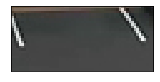

This Parking spot is Empty


In [12]:
import numpy as np
from keras.preprocessing import image
import os, glob
import matplotlib.pyplot as plt
import tensorflow as tf


#load the saved data 
loaded_model = tf.keras.models.load_model('empty_vs_occupied.h5')

#load the image
def show_images(images, cmap=None):
    cols = 2
    rows = (len(images)+1)//cols
    
    plt.figure(figsize=(4, 3))
    for i, image in enumerate(images):
        plt.subplot(rows, cols, i+1)
        # use gray scale color map if there is only one channel
        cmap = 'gray' if len(image.shape)==2 else cmap
        plt.imshow(image, cmap=cmap)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()
    
test_images = [plt.imread(path) for path in glob.glob('to_test/1.jpg')]

show_images(test_images)

#prediction:
test_image = image.load_img('to_test/1.jpg',
                                     target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
result = loaded_model.predict(test_image)


if result[0][0]==1:
    prediction = 'This Parking spot is Empty'
    print(prediction)
else:
    prediction='This Parking Spot is Occupied'
    print(prediction)
    

In [14]:
import matplotlib.pyplot as plt
import numpy
import os
from keras import applications
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras.preprocessing import image

print(model_class.history.keys())
plt.plot(model_class.history['accuracy'])
plt.plot(model_class.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

AttributeError: 'Sequential' object has no attribute 'history'

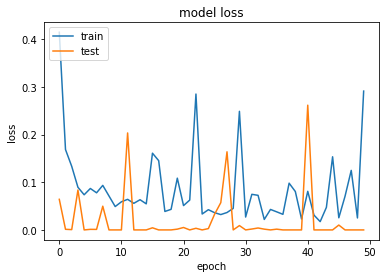

In [11]:
plt.plot(model_class.history['loss'])
plt.plot(model_class.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()